### Enlace al repositorio de GitHub: https://github.com/heldersa/Proyecto_final_gamma

## Este proyecto tiene por objectivo sacar en una primera instancia todos los datos oficiales de los partidos de la División de Honor Juvenil - Grupo de Madrid

## Luego, se pretende hacer esto para todas las ligas y rellenar una base de datos potente con la información de todo el fútbol español. Se puede utilizar para hacer análisis de todo el tipo

## Tendremos 3 tablas distintas, una con información de minutos jugados por jugador, otra con información de los goles y la ultima con la información especifica de cada partido

    - Cada partido tiene su propio id unico
    - Antes de todo se pretende hacer un scrapeo a la página 
    - Las siguientes lineas de codigo funcionaran segundo el id_partido que corresponde al URL
    - cada linea de codigo saca un dataframe distinto

## 1.Primero, ir metiendo todas las librerías que se vayan utilizando:

In [352]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.Ahora, pasamos código para hacer el scrapeo de las paginas

### 2.1.Scrap de info_partidos:

In [2]:
#para hacer iteración de los url de los partidos. ya lo appendearemos como el id_partido unico para cada partido
ids_partido = list(range(3872550, 3872790)) #de que numero a que numero tengo que pasar que me haga el bucle. los ids_partido son secuenciales en esta pagina
partido_data = []

#iterar el id_partido segun la lista que hemos pasado ids_partido
for id_partido in ids_partido:
    try:
        url = f"https://rfef.es/es/competiciones/division-de-honor-juvenil/acta/{id_partido}" #de momento, aunque algunos partidos no sean division de honor juvenil, el url funcionara igualmente
        response = req.get(url)
        if response.status_code == 200:
            page = response.content
            soup = BeautifulSoup(page, 'html.parser')
            
            id_partido = id_partido #esta linea podría ser borrada en realidad, pero la dejo pq en algun test 
                                    #me ha fallado el id_partido y así no hay problemas

            #buscar todas las infos de un id_partido especifico. al ser elementos de bs se tiene que identificar 
            #su class a través del codigo html de la pagina
            
            competition_tag = soup.find('div', class_='acta-category')
            competition = competition_tag.text.strip()

            fixture_tag = soup.find('div', class_='acta-jornada')
            fixture = fixture_tag.text.strip()
            
            date_tag = soup.find('div', class_ = 'acta-fecha')
            date = date_tag.text.strip()
            
            city_tag = soup.find('div', class_ = 'acta-ciudad')
            city = city_tag.text.strip()
            
            stadium_tag = soup.find('div', class_ = 'acta-campo')
            stadium = stadium_tag.text.strip()

            resultado_tag = soup.find('span', class_='acta-resultado')
            resultado = resultado_tag.text.strip()
            
            result_table = soup.find('table', class_='acta-result-table')
            team_names = result_table.find_all('td')

            home_team = team_names[0].text.strip()
            away_team = team_names[2].text.strip()

            partido_data.append([id_partido,competition, fixture, date, city, stadium, resultado,home_team, away_team])
        else:
            print(f"No se encontró la página para el ID {id_partido}")
    except Exception as e:
        print(f"Ocurrió un error al procesar el ID {id_partido}: {str(e)}")

partido_data = pd.DataFrame(partido_data, columns=['id_partido','competition', 'fixture', 'date', 'city', 'stadium', 'resultado', 'home_team','away_team'])

,id_partido,competition,fixture,date,city,stadium,resultado,home_team,away_team
0,3872550,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Getafe,Estadio: Ciudad Deportiva Getafe,3 - 0,Getafe C.F. SAD,U.D. La Cruz Villanovense
1,3872551,División de Honor Juvenil,Jornada 1,04/09/2022 12:30h,Ciudad: Valladolid,Estadio: Anexos E.M. José Zorrilla (H. Artific...,1 - 2,Real Valladolid C.F. S.A.D.,Club Atlético de Madrid SAD
2,3872552,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Madrid,Estadio: C.Dep. Fundacion Rayo Vallecano - Cam...,0 - 2,Rayo Vallecano de Madrid SAD,C.F. Fuenlabrada SAD
3,3872553,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Alcorcón,Estadio: P.M. Santo Domingo,2 - 1,A.D. Alcorcón SAD,C.D.I. de la Amistad
4,3872554,División de Honor Juvenil,Jornada 1,03/09/2022 19:00h,Ciudad: Valdebebas,Estadio: Ciudad Real Madrid,7 - 0,Real Madrid C.F.,C.D. Badajoz 1905
...,...,...,...,...,...,...,...,...,...
235,3872785,División de Honor Juvenil,Jornada 30,06/05/2023 12:00h,Ciudad: Valdebebas,Estadio: Ciudad Real Madrid,8 - 1,Real Madrid C.F.,C.D.I. de la Amistad
236,3872786,División de Honor Juvenil,Jornada 30,06/05/2023 16:00h,Ciudad: Alcorcón,Estadio: Santo Domingo,1 - 2,A.D. Alcorcón SAD,C.F. Fuenlabrada SAD
237,3872787,División de Honor Juvenil,Jornada 30,06/05/2023 16:00h,Ciudad: Madrid,Estadio: C.Dep. Fundacion Rayo Vallecano - Cam...,0 - 0,Rayo Vallecano de Madrid SAD,Club Atlético de Madrid SAD
238,3872788,División de Honor Juvenil,Jornada 30,07/05/2023 15:30h,Ciudad: Valladolid,Estadio: Anexos E.M. José Zorrilla 3,4 - 1,Real Valladolid C.F. S.A.D.,U.D. La Cruz Villanovense


## 2.1.1.Ahora, extraemos los datos y los dejamos en un dataframe llamado info_partidos:

In [210]:
partido_data.to_csv('info_partidos.csv', sep='\t', encoding='utf-8', index=False)

## 2.2.Tabla info_goles para retirar los goles marcados en cada partido (pd.dataframe = goles_data)

In [42]:
#hacer tabla donde tenga la informacion del marcador y id_partido para cruzar info

ids_partido = list(range(3872550, 3872790))
goles_data = pd.DataFrame()

for id_partido in ids_partido:
    try:
        url = f"https://rfef.es/es/competiciones/division-de-honor-juvenil/acta/{id_partido}"
        response = req.get(url)
        if response.status_code == 200:
            page = response.content
            soup = BeautifulSoup(page, 'html.parser')
            
            scorers_table = soup.find('table',class_="acta-result-jugardores-table")
            
            #to add scorers values for two different dicts. one for home and other for away
            #for that we use first a scorers table for both and then divide them on two
            
            scorers_home = {}
            scorers_away = {}
            
            #los marcadores tienen la palabra li en el acta segun el codigo html. 
            #home es el [0] ya que es la primera tabla
            
            home_scorers = scorers_table.find_all('td')[0].find_all('li')

            scorers_home['id_partido'] = id_partido
            scorers_home['team'] = 'home'
            scorers_home['scorers'] = home_scorers
            
            #añadimos esta informacion a un df llamado scorers1 para juntarlo al dos
            
            scorers1 = pd.DataFrame.from_dict(scorers_home)
            
            #repetimos el proceso
    
            away_scorers = scorers_table.find_all('td')[1].find_all('li')

            scorers_away['id_partido'] = id_partido
            scorers_away['team'] = 'away'
            scorers_away['scorers'] = away_scorers
            
            scorers2 = pd.DataFrame.from_dict(scorers_away)
            
            scorers = pd.concat([scorers1, scorers2]).reset_index(drop=True)

            goles_data = pd.concat([goles_data, scorers]).reset_index(drop=True)
            
            #se pueden hacer tests con las url que funcionan sacando este print. entender si es del url
        else:
            print(f"No se encontró la página para el ID {id_partido}")
    except Exception as e:
        print(f"Ocurrió un error al procesar el ID {id_partido}: {str(e)}")

,id_partido,team,scorers
0,3872550,home,[Rovira 53' ]
1,3872550,home,[Fernandez 6' ]
2,3872550,away,[Asensio 70' (PP)]
3,3872551,home,[Alexander 25' (P)]
4,3872551,away,[Fabian 60' ]
...,...,...,...
740,3872788,home,[Alejandro 88' (P)]
741,3872788,away,[Garcia 89' (P)]
742,3872789,home,[Carvajal 85' ]
743,3872789,home,[Fernandez 90' ]


## 2.2.1. info_goles to csv

In [209]:
goles_data.to_csv('info_goles.csv', sep='\t', encoding='utf-8', index=False)

## 2.3.Tabla info_minutos para tener minutos jugados de cada jugador por partido

In [64]:
#hacer tabla donde tenga los minutos de los jugadores y id_partido para cruzar info
#hay que saber de que equipo jugaba, si de local o de visitante, para evitar nombres repetidos e identificar los jugadores

ids_partido = list(range(3872550, 3872790))
minutos_data = pd.DataFrame()

for id_partido in ids_partido:
    try:
        url = f"https://rfef.es/es/competiciones/division-de-honor-juvenil/acta/{id_partido}"
        response = req.get(url)
        if response.status_code == 200:
            page = response.content
            soup = BeautifulSoup(page, 'html.parser')
            
                        #codigo para verificar lineups y minutos jugados
            lineup_table = soup.find_all('div',class_="acta-titulares")[0].find_all('td')
            home_lineup=[]
            away_lineup= []
            home_minutes =[]
            away_minutes =[]
            home_minutes_subs =[]
            away_minutes_subs =[]
            for i, jugador in enumerate(lineup_table):
                if i % 2 == 0:
                    home_lineup.append(jugador.text.strip().split('\n')[0])
                else:
                    away_lineup.append(jugador.text.strip().split('\n')[0])

            #sacar minutos totales de todos los participantes del partido como titulares

            #utilizar una lista de 22 jugadores, todos con 90 minutos jugados
            minutos_jugados = [90]*22

            #a partir de esta lista, hacer un bucle para cambiar 90 minutos por los minutos que ha sido sustituido
            for i, jugador in enumerate(lineup_table):

            #para los minutos ver el ultimo valor que hay y cambiarlo a entero para tener los minutos jugados
                minute = jugador.text.strip().split('\n')[-1].strip().split("'")
                if len(minute)>1:
                    minutos_jugados[i] = int(minute[0])
            for i, minute in enumerate(minutos_jugados):
                if i % 2 == 0:
                    home_minutes.append(minute)
                else:
                    away_minutes.append(minute)

            #sacar los suplentes

            subs_table = soup.find_all('div',class_="acta-suplentes")[0].find_all('td')
            home_subs=[]
            away_subs= []
            for i, jugador in enumerate(subs_table):
                if i % 2 == 0:
                    home_subs.append(jugador.text.strip().split('\n')[0])
                else:
                    away_subs.append(jugador.text.strip().split('\n')[0])

            away_subs

            #sacar minutos totales de todos los participantes del partido como suplentes

            #utilizar una lista de len de la lista de suplentes, todos con 0 minutos jugados
            minutos_subs = [0]*(len(home_subs)*2)

            #a partir de esta lista, hacer un bucle para cambiar 0 minutos por los minutos que ha sido sustituido y hacer 90-minutos
            for i, jugador in enumerate(subs_table):

            #para los minutos ver el ultimo valor que hay y cambiarlo a entero para tener los minutos jugados
                minute = jugador.text.strip().split('\n')[-1].strip().split("'")
                if len(minute)>1:
                    minutos_subs[i] = 90 - int(minute[0])
                else:
                    minutos_subs[i] = 0
            for i, minute in enumerate(minutos_subs):
                if i % 2 == 0:
                    home_minutes_subs.append(minute)
                else:
                    away_minutes_subs.append(minute)

            #to add scorers values for two different lists. one for home and other for away
            #for that we use first a scorers table for both and then divide them on two
            lineups_home = {}
            lineups_away = {}
            subs_home = {}
            subs_away = {}

            lineups_home['id_partido'] = id_partido
            lineups_home['team'] = 'home'
            lineups_home['player'] = home_lineup
            lineups_home['minutes'] = home_minutes
            lineups_home['titular_sup'] = "titular"

            lineups1 = pd.DataFrame.from_dict(lineups_home)

            lineups_away['id_partido'] = id_partido
            lineups_away['team'] = 'away'
            lineups_away['player'] = away_lineup
            lineups_away['minutes'] = away_minutes
            lineups_away['titular_sup'] = "titular"

            lineups2 = pd.DataFrame.from_dict(lineups_away)

            subs_home['id_partido'] = id_partido
            subs_home['team'] = 'home'
            subs_home['player'] = home_subs
            subs_home['minutes'] = home_minutes_subs
            subs_home['titular_sup'] = "sup"

            subs1 = pd.DataFrame.from_dict(subs_home)

            subs_away['id_partido'] = id_partido
            subs_away['team'] = 'away'
            subs_away['player'] = away_subs
            subs_away['minutes'] = away_minutes_subs
            subs_away['titular_sup'] = "sup"

            subs2 = pd.DataFrame.from_dict(subs_away)


            minutinhos = pd.concat([lineups1, lineups2, subs1, subs2]).reset_index(drop=True)

            minutos_data = pd.concat([minutos_data, minutinhos]).reset_index(drop=True)
        else:
            print(f"No se encontró la página para el ID {id_partido}")
    except Exception as e:
        print(f"Ocurrió un error al procesar el ID {id_partido}: {str(e)}")

minutos_data

,id_partido,team,player,minutes,titular_sup
0,3872550,home,1 Blanco,90,titular
1,3872550,home,2 Alberto,90,titular
2,3872550,home,4 Raul Martin,90,titular
3,3872550,home,8 Llorente,70,titular
4,3872550,home,10 Rovira,60,titular
...,...,...,...,...,...
8629,3872789,away,12 Martin,1,sup
8630,3872789,away,17 Cuevas,30,sup
8631,3872789,away,18 Kawecki,0,sup
8632,3872789,away,19 Greciano,30,sup


## 2.3.1.info_minutos to csv

In [208]:
minutos_data.to_csv('info_minutos.csv', sep='\t', encoding='utf-8', index=False)

## 3.Ahora que ya tenemos los 3 dataframes que vamos a trabajar los podemos limpiar para tener datos más legibles

In [343]:
partidos = pd.read_csv('info_partidos.csv', sep='\t', encoding='utf-8')
goles = pd.read_csv('info_goles.csv', sep='\t', encoding='utf-8')
minutos = pd.read_csv('info_minutos.csv', sep='\t', encoding='utf-8')

## 3.1.Limpiar el dataframe de partidos

In [344]:
#hacemos una copia para testarlo
partidos_limpio = partidos.copy()

partidos_limpio['jornada'] = partidos_limpio['fixture'].str.extract(r'(\d+)')
partidos_limpio['jornada'] = partidos_limpio['jornada'].astype(int)

partidos_limpio['fecha'] = pd.to_datetime(partidos_limpio['date'].str[:10], format='%d/%m/%Y')
partidos_limpio['hora'] = partidos['date'].str[11:]

partidos_limpio['ciudad'] = partidos_limpio['city'].str.replace('Ciudad: ', '')
partidos_limpio['estadio'] = partidos_limpio['stadium'].str.replace('Estadio: ', '')

partidos_limpio[['home_goals', 'away_goals']] = partidos_limpio['resultado'].str.split('-', expand=True).astype(int)

# Función para calcular los puntos
def calcular_puntos_home(row):
    if row["home_goals"] > row["away_goals"]:
        return 3
    elif row["home_goals"] < row["away_goals"]:
        return 0
    else:
        return 1
    
def calcular_puntos_away(row):
    if row["away_goals"] > row["home_goals"]:
        return 3
    elif row["away_goals"] < row["home_goals"]:
        return 0
    else:
        return 1

# Agregar columnas de puntos
partidos_limpio["home_points"] = partidos_limpio.apply(lambda row: calcular_puntos_home(row), axis=1)
partidos_limpio["away_points"] = partidos_limpio.apply(lambda row: calcular_puntos_away(row), axis=1)

partidos_limpio

,id_partido,competition,fixture,date,city,stadium,resultado,home_team,away_team,jornada,fecha,hora,ciudad,estadio,home_goals,away_goals,home_points,away_points
0,3872550,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Getafe,Estadio: Ciudad Deportiva Getafe,3 - 0,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0
1,3872551,División de Honor Juvenil,Jornada 1,04/09/2022 12:30h,Ciudad: Valladolid,Estadio: Anexos E.M. José Zorrilla (H. Artific...,1 - 2,Real Valladolid C.F. S.A.D.,Club Atlético de Madrid SAD,1,2022-09-04,12:30h,Valladolid,Anexos E.M. José Zorrilla (H. Artificial),1,2,0,3
2,3872552,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Madrid,Estadio: C.Dep. Fundacion Rayo Vallecano - Cam...,0 - 2,Rayo Vallecano de Madrid SAD,C.F. Fuenlabrada SAD,1,2022-09-03,18:00h,Madrid,C.Dep. Fundacion Rayo Vallecano - Campo 4,0,2,0,3
3,3872553,División de Honor Juvenil,Jornada 1,03/09/2022 18:00h,Ciudad: Alcorcón,Estadio: P.M. Santo Domingo,2 - 1,A.D. Alcorcón SAD,C.D.I. de la Amistad,1,2022-09-03,18:00h,Alcorcón,P.M. Santo Domingo,2,1,3,0
4,3872554,División de Honor Juvenil,Jornada 1,03/09/2022 19:00h,Ciudad: Valdebebas,Estadio: Ciudad Real Madrid,7 - 0,Real Madrid C.F.,C.D. Badajoz 1905,1,2022-09-03,19:00h,Valdebebas,Ciudad Real Madrid,7,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3872785,División de Honor Juvenil,Jornada 30,06/05/2023 12:00h,Ciudad: Valdebebas,Estadio: Ciudad Real Madrid,8 - 1,Real Madrid C.F.,C.D.I. de la Amistad,30,2023-05-06,12:00h,Valdebebas,Ciudad Real Madrid,8,1,3,0
236,3872786,División de Honor Juvenil,Jornada 30,06/05/2023 16:00h,Ciudad: Alcorcón,Estadio: Santo Domingo,1 - 2,A.D. Alcorcón SAD,C.F. Fuenlabrada SAD,30,2023-05-06,16:00h,Alcorcón,Santo Domingo,1,2,0,3
237,3872787,División de Honor Juvenil,Jornada 30,06/05/2023 16:00h,Ciudad: Madrid,Estadio: C.Dep. Fundacion Rayo Vallecano - Cam...,0 - 0,Rayo Vallecano de Madrid SAD,Club Atlético de Madrid SAD,30,2023-05-06,16:00h,Madrid,C.Dep. Fundacion Rayo Vallecano - Campo 4,0,0,1,1
238,3872788,División de Honor Juvenil,Jornada 30,07/05/2023 15:30h,Ciudad: Valladolid,Estadio: Anexos E.M. José Zorrilla 3,4 - 1,Real Valladolid C.F. S.A.D.,U.D. La Cruz Villanovense,30,2023-05-07,15:30h,Valladolid,Anexos E.M. José Zorrilla 3,4,1,3,0


## 3.1.1.Del dataframe limpio podemos cepillar las columnas que no sirven

In [345]:
partidos_limpio.drop(['fixture', 'date', 'city', 'stadium', 'resultado'],axis=1, inplace=True)

## 3.1.2.Ahora ya tenemos el dataframe limpio, utilizamos la celda de abajo para guardar el df limpio

In [346]:
partidos_limpio.to_csv('info_partidos_limpio.csv', sep='\t', encoding='utf-8', index=False)

## 3.2.Limpiar el dataframe de goles

In [217]:
#hacemos una copia para testarlo
goles_limpio = goles.copy()

#Elimina las etiquetas <li> utilizando expresiones regulares y la función str.replace():
goles_limpio['scorers'] = goles_limpio['scorers'].str.replace(r'<li>|</li>', '', regex=True)

goles_limpio['jugador'] = goles_limpio['scorers'].str.extract(r'([A-Za-z\s]+)') # Extrae el nombre del jugador
goles_limpio['minuto_gol'] = goles_limpio['scorers'].str.extract(r'(\d+)').astype(int) # Extrae el minuto del gol
goles_limpio['propia_puerta'] = goles_limpio['scorers'].str.contains('PP') # Verifica si es un propio gol (PP)
goles_limpio['penalty'] = goles_limpio['scorers'].str.contains(r'\(\w\)') # Verifica si es un gol de penal (P)

# Reemplaza los valores NaN con False en las columnas propia_puerta y penalty
goles_limpio['propia_puerta'].fillna(False, inplace=True)
goles_limpio['penalty'].fillna(False, inplace=True)

## 3.2.1.Del dataframe limpio podemos cepillar las columnas que no sirven

In [219]:
goles_limpio.drop(['scorers'],axis=1, inplace=True)

## 3.2.2.Ahora ya tenemos el dataframe limpio, guardamos el df limpio

In [220]:
goles_limpio.to_csv('info_goles_limpio.csv', sep='\t', encoding='utf-8', index=False)

## 3.3.Limpiar el dataframe de minutos

In [221]:
minutos_limpio = minutos.copy()

# Extraer el dorsal y el nombre del jugador utilizando una expresión regular
minutos_limpio[['dorsal', 'jugador']] = minutos_limpio['player'].str.extract(r'(\d+)\s(.+)')

# Convertir la columna "dorsal" a tipo entero
minutos_limpio['dorsal'] = minutos_limpio['dorsal']

# Transformar la columna "titular_sup" en columnas "titular" y "suplente" como booleanos
minutos_limpio['titular'] = minutos_limpio['titular_sup'] == 'titular'
minutos_limpio['suplente'] = ~minutos_limpio['titular']
minutos_limpio.dropna(subset=['dorsal'], inplace=True)

## 3.3.1 Cepillar columnas para terminar limpieza

In [223]:
minutos_limpio.drop(['player','titular_sup'],axis=1, inplace=True)

In [224]:
minutos_limpio

,id_partido,team,minutes,dorsal,jugador,titular,suplente
0,3872550,home,90,1,Blanco,True,False
1,3872550,home,90,2,Alberto,True,False
2,3872550,home,90,4,Raul Martin,True,False
3,3872550,home,70,8,Llorente,True,False
4,3872550,home,60,10,Rovira,True,False
...,...,...,...,...,...,...,...
8629,3872789,away,1,12,Martin,False,True
8630,3872789,away,30,17,Cuevas,False,True
8631,3872789,away,0,18,Kawecki,False,True
8632,3872789,away,30,19,Greciano,False,True


## 3.3.2.Ahora ya tenemos el dataframe limpio, utilizamos la celda de abajo para guardar el df limpio

In [225]:
minutos_limpio.to_csv('info_minutos_limpio.csv', sep='\t', encoding='utf-8', index=False)

## 4.Ya tenemos los 3 dataframes sobre los cuales vamos a trabajar

## 4.1. Para que sea legible, intentaremos simplificar al máximo las tablas con el máximo de información que podamos reunir para sacar conclusiones por jugador, por equipo, etc

In [363]:
teste = minutos_limpio.merge(partidos_limpio, left_on='id_partido', right_on='id_partido')
teste['equipo'] = teste.apply(lambda row: row['home_team'] if row['team'] == 'home' else row['away_team'], axis=1)
teste.drop('team', axis=1, inplace=True)


teste

,id_partido,minutes,dorsal,jugador,titular,suplente,competition,home_team,away_team,jornada,fecha,hora,ciudad,estadio,home_goals,away_goals,home_points,away_points,equipo
0,3872550,90,1,Blanco,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0,Getafe C.F. SAD
1,3872550,90,2,Alberto,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0,Getafe C.F. SAD
2,3872550,90,4,Raul Martin,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0,Getafe C.F. SAD
3,3872550,70,8,Llorente,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0,Getafe C.F. SAD
4,3872550,60,10,Rovira,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,3,0,Getafe C.F. SAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,3872789,1,12,Martin,False,True,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,3,0,Getafe C.F. SAD
8581,3872789,30,17,Cuevas,False,True,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,3,0,Getafe C.F. SAD
8582,3872789,0,18,Kawecki,False,True,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,3,0,Getafe C.F. SAD
8583,3872789,30,19,Greciano,False,True,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,3,0,Getafe C.F. SAD


In [351]:
#ver las entradas de jugadores que han participado
teste.home_team.value_counts()

Club Atlético de Madrid SAD     540
C.D. Leganés SAD                540
Rayo Ciudad Alcobendas CF       539
Real Valladolid C.F. S.A.D.     538
A.D. Alcorcón SAD               538
C.F. Rayo Majadahonda           538
Getafe C.F. SAD                 537
C. y D. Leonesa S.A.D.          537
C.F. Fuenlabrada SAD            537
Real Madrid C.F.                536
C.D. Col. Diocesano             536
C.D. Badajoz 1905               536
AD Sporting Hortaleza           536
Rayo Vallecano de Madrid SAD    534
C.D.I. de la Amistad            533
U.D. La Cruz Villanovense       530
Name: home_team, dtype: int64

## 4.1.1.Ejemplo del Leganés - no filtramos por dorsal ya que muchos jugadores juegan con numeros diferentes

In [308]:
equipo_seleccionado = 'C.D. Leganés SAD'  # Nombre del equipo seleccionado

# Filtrar el DataFrame para el equipo seleccionado y obtener la suma de minutos agrupada por nombre de jugador y dorsal
info_equipo = teste[teste['equipo']== equipo_seleccionado].groupby(['dorsal','jugador','equipo'])['minutes'].sum()

# Convertir el resultado en un nuevo DataFrame
info_equipo = info_equipo.reset_index(name='suma_minutos').sort_values('suma_minutos', ascending=False)

# Imprimir el resultado
info_equipo.head(40)

#CADA EQUIPO TIENE SU ESTRATEGIA, MUCHOS EQUIPOS SUELEN CAMBIAR LOS NUMEROS DE LOS JUGADORES, SE TIENE QUE VER CASO A CASO
#EN UN CONTEXTO MÁS PROFESIONAL NO TENDREMOS ESTE PROBLEMA YA QUE TODOS LOS JUGADORES TIENEN SU PROPIO NUMERO

,dorsal,jugador,equipo,suma_minutos
106,8,Awuah,C.D. Leganés SAD,2177
97,6,Herrero,C.D. Leganés SAD,2026
90,4,Rodriguez,C.D. Leganés SAD,1789
1,1,Luciano,C.D. Leganés SAD,1710
91,5,Garcia,C.D. Leganés SAD,1642
84,3,Fernandez,C.D. Leganés SAD,1513
2,10,Adrian,C.D. Leganés SAD,1330
74,2,Puente,C.D. Leganés SAD,1277
110,9,Magariño,C.D. Leganés SAD,1270
111,9,Moreno,C.D. Leganés SAD,1150


## 4.1.2. Ejemplo del Leganés, no filtrado por dorsal

In [364]:
equipo_seleccionado = 'C.D. Leganés SAD'  # Nombre del equipo seleccionado

# Filtrar el DataFrame para el equipo seleccionado y obtener la suma de minutos agrupada por nombre de jugador y dorsal
info_equipo = teste[teste['equipo']== equipo_seleccionado].groupby(['jugador','equipo'])['minutes'].sum()

# Convertir el resultado en un nuevo DataFrame
info_equipo = info_equipo.reset_index(name='suma_minutos').sort_values('suma_minutos', ascending=False)

# Imprimir el resultado
info_equipo.head(40)

,jugador,equipo,suma_minutos
36,Serrano,Real Madrid C.F.,2456
16,Jimenez,Real Madrid C.F.,2363
23,Moran,Real Madrid C.F.,2041
31,Ramon,Real Madrid C.F.,1899
3,Cesar,Real Madrid C.F.,1876
4,Chema,Real Madrid C.F.,1858
12,Garcia,Real Madrid C.F.,1843
40,Yeray,Real Madrid C.F.,1696
28,Piñeiro,Real Madrid C.F.,1410
8,Enriquez,Real Madrid C.F.,1282


## 4.1.3.Ya entra la parte subjectiva... Quien queremos analisar en este contexto, que buscamos? Podemos buscar jugadores con pocos minutos de equipos top, podemos buscar jugadores que tengan muchos minutos para incorporar nuestro equipo, todo depende de lo que es nuestro target

In [260]:
#como ejemplo dejo un listado de jugadores que sería interesante observar, aunque no tenemos toda la info visto que muchos cambian los dorsales
listado_scouting1 = teste.groupby(['dorsal','jugador', 'equipo'])['minutes'].sum()

# Convertir el resultado en un nuevo DataFrame
listado_scouting1 = listado_scouting1.reset_index(name='total_minutos').sort_values('total_minutos', ascending=False)

# Imprimir el resultado
listado_scouting1.head(50)

,dorsal,jugador,equipo,total_minutos
1182,4,Fernandez,U.D. La Cruz Villanovense,2671
26,1,Rios,C.F. Fuenlabrada SAD,2593
1443,8,Llorente,Getafe C.F. SAD,2555
1037,24,Miguel,AD Sporting Hortaleza,2490
1299,6,J.NAVARRO,A.D. Alcorcón SAD,2446
954,2,Requena,C.F. Fuenlabrada SAD,2429
1177,4,Ciriero,C.D. Col. Diocesano,2427
603,16,Emanuelle,A.D. Alcorcón SAD,2424
1198,4,Mari,A.D. Alcorcón SAD,2423
1255,5,Muñoz,C.D. Col. Diocesano,2403


## Estamos obliviando algunos jugadores por el tema de cambio de dorsales, pueden también ser jugadores interesantes ya que algunos equipos suelen cambiar los dorsales según la posición en el campo (jugadores polivalentes), otros juegan siempre con el mismo numero. En las ligas profesionales hasta 1 rfef se puede usar el codigo arriba ya que los jugadores tienen su numero propio

## 4.2.Limpieza del dataframe de goles

In [231]:
goles_limpio

,id_partido,team,jugador,minuto_gol,propia_puerta,penalty
0,3872550,home,Rovira,53,False,False
1,3872550,home,Fernandez,6,False,False
2,3872550,away,Asensio,70,True,False
3,3872551,home,Alexander,25,False,True
4,3872551,away,Fabian,60,False,False
...,...,...,...,...,...,...
740,3872788,home,Alejandro,88,False,True
741,3872788,away,Garcia,89,False,True
742,3872789,home,Carvajal,85,False,False
743,3872789,home,Fernandez,90,False,False


In [316]:
teste1 = goles_limpio.merge(partidos_limpio, left_on='id_partido', right_on='id_partido')
teste1['equipo'] = teste1.apply(lambda row: row['home_team'] if row['team'] == 'home' else row['away_team'], axis=1)
franja_10min = list(range(0, 100, 10))
teste1['goles_por_franja_10min'] = pd.cut(teste1['minuto_gol'], bins=franja_10min + [100], right=False,
                                      labels=[f"{i}-{i+10}" for i in franja_10min[:-1]] + ['90+'])

teste1.drop('team', axis=1, inplace=True)

teste1

,id_partido,jugador,minuto_gol,propia_puerta,penalty,competition,home_team,away_team,jornada,fecha,hora,ciudad,estadio,home_goals,away_goals,equipo,goles_por_franja_10min
0,3872550,Rovira,53,False,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,Getafe C.F. SAD,50-60
1,3872550,Fernandez,6,False,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,Getafe C.F. SAD,0-10
2,3872550,Asensio,70,True,False,División de Honor Juvenil,Getafe C.F. SAD,U.D. La Cruz Villanovense,1,2022-09-03,18:00h,Getafe,Ciudad Deportiva Getafe,3,0,U.D. La Cruz Villanovense,70-80
3,3872551,Alexander,25,False,True,División de Honor Juvenil,Real Valladolid C.F. S.A.D.,Club Atlético de Madrid SAD,1,2022-09-04,12:30h,Valladolid,Anexos E.M. José Zorrilla (H. Artificial),1,2,Real Valladolid C.F. S.A.D.,20-30
4,3872551,Fabian,60,False,False,División de Honor Juvenil,Real Valladolid C.F. S.A.D.,Club Atlético de Madrid SAD,1,2022-09-04,12:30h,Valladolid,Anexos E.M. José Zorrilla (H. Artificial),1,2,Club Atlético de Madrid SAD,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,3872788,Alejandro,88,False,True,División de Honor Juvenil,Real Valladolid C.F. S.A.D.,U.D. La Cruz Villanovense,30,2023-05-07,15:30h,Valladolid,Anexos E.M. José Zorrilla 3,4,1,Real Valladolid C.F. S.A.D.,80-90
741,3872788,Garcia,89,False,True,División de Honor Juvenil,Real Valladolid C.F. S.A.D.,U.D. La Cruz Villanovense,30,2023-05-07,15:30h,Valladolid,Anexos E.M. José Zorrilla 3,4,1,U.D. La Cruz Villanovense,80-90
742,3872789,Carvajal,85,False,False,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,Rayo Ciudad Alcobendas CF,80-90
743,3872789,Fernandez,90,False,False,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Getafe C.F. SAD,30,2023-05-07,14:00h,Alcobendas,Luis Aragonés - Ppvo. Mpal. José Caballero,2,1,Rayo Ciudad Alcobendas CF,90+


## 4.2.1.Tabla final de goles con info de goles marcados por jugador

In [312]:
tabla_final = teste1.groupby(['jugador', 'equipo']).agg({'minuto_gol': 'count', 'penalty': 'sum', 'propia_puerta': 'sum'}).reset_index()
tabla_final.rename(columns={'minuto_gol': 'total_goles', 'penalty': 'total_penalties', 'propia_puerta': 'total_propia_puerta'}, inplace=True)
tabla_final['total_goles_marcados'] = tabla_final['total_goles'] - tabla_final['total_propia_puerta']

# Imprimir la tabla final
tabla_final.sort_values(by = 'total_goles_marcados', ascending = False).head(10)

,jugador,equipo,total_goles,total_penalties,total_propia_puerta,total_goles_marcados
85,Garcia,Real Madrid C.F.,28,0,1,27
38,Carvajal,Rayo Ciudad Alcobendas CF,24,0,0,24
156,Ni,Club Atlético de Madrid SAD,24,3,0,24
175,Raihani,Club Atlético de Madrid SAD,20,1,0,20
40,Cesar,Real Madrid C.F.,16,0,0,16
195,Santiago,C.D.I. de la Amistad,14,0,0,14
71,Fernandez,A.D. Alcorcón SAD,13,3,0,13
32,Cabezas,C.F. Rayo Majadahonda,12,1,0,12
74,Fernandez,Getafe C.F. SAD,11,0,0,11
12,Alonso,Rayo Vallecano de Madrid SAD,11,0,0,11


## 4.2.2. Tabla de goles + tabla de minutos

In [297]:
tabla_final['equipo_jugador'] = tabla_final['equipo'].str.strip() + ' ' + tabla_final['jugador'].str.strip()
listado_scouting1['equipo_jugador'] = listado_scouting1['equipo'].str.strip() + ' ' + listado_scouting1['jugador'].str.strip()

tabla_final1 = pd.merge(listado_scouting1, tabla_final[['equipo_jugador', 'total_goles_marcados']], on='equipo_jugador', how='left')
tabla_final1['total_goles_marcados'] = tabla_final1['total_goles_marcados'].fillna(0)


# Imprimir la tabla final1
listado_scouting_final = tabla_final1.drop('equipo_jugador', axis=1)
listado_scouting_final


,dorsal,jugador,equipo,total_minutos,total_goles_marcados
0,4,Fernandez,U.D. La Cruz Villanovense,2671,3.0
1,1,Rios,C.F. Fuenlabrada SAD,2593,0.0
2,8,Llorente,Getafe C.F. SAD,2555,5.0
3,24,Miguel,AD Sporting Hortaleza,2490,4.0
4,6,J.NAVARRO,A.D. Alcorcón SAD,2446,0.0
...,...,...,...,...,...
1523,14,Garcia,C.D. Leganés SAD,0,3.0
1524,16,Tandjigora,Rayo Vallecano de Madrid SAD,0,0.0
1525,16,Sotres,Real Madrid C.F.,0,1.0
1526,15,Aceituno,C.F. Rayo Majadahonda,0,1.0


In [362]:
listado_scouting_final[listado_scouting_final['equipo'] == 'Real Madrid C.F.'].head(30)

,dorsal,jugador,equipo,total_minutos,total_goles_marcados
27,2,Jimenez,Real Madrid C.F.,2073,3.0
40,5,Serrano,Real Madrid C.F.,1983,1.0
49,8,Moran,Real Madrid C.F.,1890,9.0
62,7,Garcia,Real Madrid C.F.,1772,27.0
104,1,Piñeiro,Real Madrid C.F.,1410,0.0
114,6,Chema,Real Madrid C.F.,1335,2.0
117,10,Cesar,Real Madrid C.F.,1309,16.0
154,24,Ramon,Real Madrid C.F.,1046,2.0
164,4,Camero,Real Madrid C.F.,998,0.0
186,1,Quetglas,Real Madrid C.F.,900,0.0


## 5.1.Visualización con las tablas que tengo

In [ ]:
## se puede montar la tabla clasificatoria. nos puede venir bien en caso de hacer algun analisis especifico para un equipo,
## categorizar la clasificacion por ejemplo, entre partes altas y bajas de la tabla 

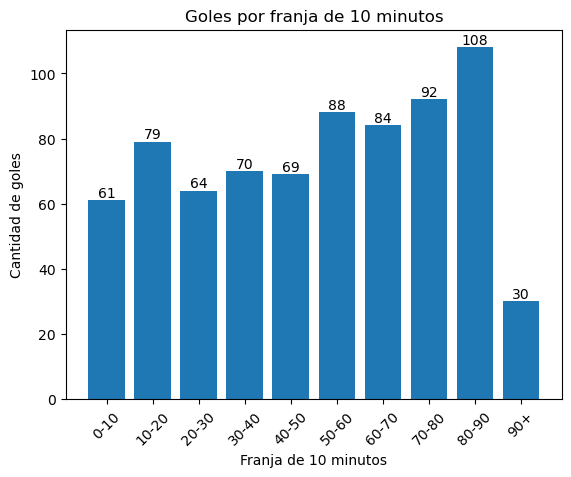

In [354]:
# Agrupar los goles por franja de 10 minutos
goles_franja = teste1.groupby('goles_por_franja_10min')['id_partido'].count()

# Crear el gráfico de barras
plt.bar(goles_franja.index, goles_franja.values)

# Agregar etiquetas con el total de goles en cada franja
for i, v in enumerate(goles_franja.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Personalizar el gráfico
plt.xlabel('Franja de 10 minutos')
plt.ylabel('Cantidad de goles')
plt.title('Goles por franja de 10 minutos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## 5.1.dentro de esta franja maxima de los 80-90, podemos observar que club hizo más goles en esa franja

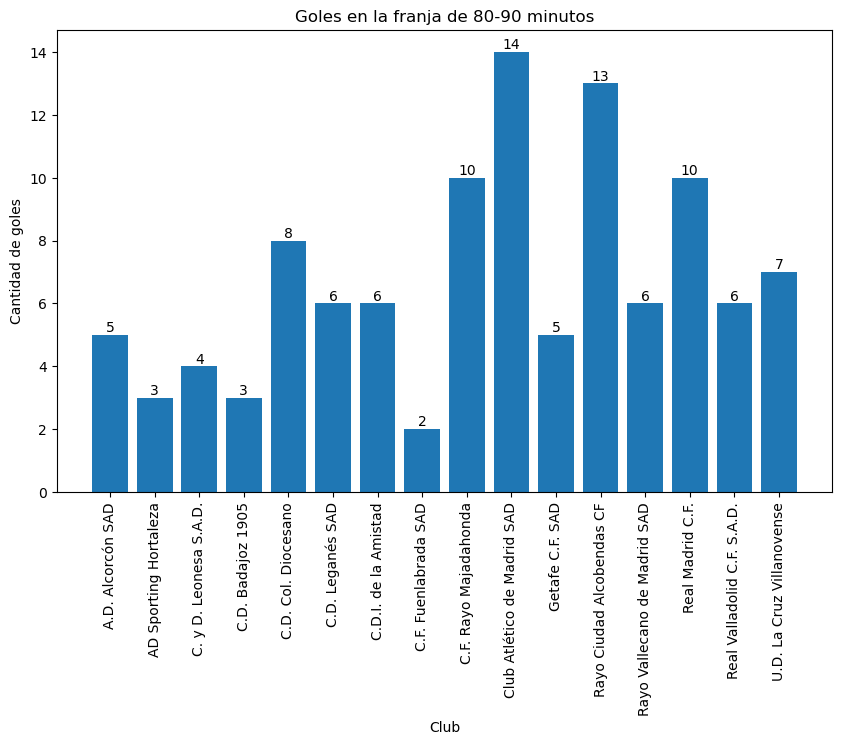

In [367]:
# Filtrar los datos para la franja de 80-90 minutos
franja_80_90 = teste1[teste1['goles_por_franja_10min'] == '80-90']

# Calcular los totales de goles para cada club en la franja de 80-90 minutos
goles_por_club = franja_80_90.groupby('equipo')['id_partido'].count()

# Obtener el club con más goles en la franja de 80-90 minutos
club_max_goles = goles_por_club.idxmax()

# Crear la figura con un tamaño personalizado
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(goles_por_club.index, goles_por_club.values)

# Agregar etiquetas con el total de goles para cada club
for i, v in enumerate(goles_por_club.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Personalizar el gráfico
plt.xlabel('Club')
plt.ylabel('Cantidad de goles')
plt.title('Goles en la franja de 80-90 minutos')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()



## 5.2. Y si quiero entrar más en detalle en los jugadores individualmente se puede hacer... Un ejemplo de una ficha de jugador

In [374]:
#en este caso cogemos el ejemplo del mejor goleador de la liga. cuantos minutos hizo por jornada

analise_individual = 'Garcia'
equipo_individual = 'Real Madrid C.F.'

# Filtrar los datos para el jugador García del Real Madrid
jugador_filtrado = teste[(teste['jugador'] == analise_individual) & (teste['equipo'] == equipo_individual)]

# Seleccionar las columnas específicas
columnas_seleccionadas = ['id_partido', 'jornada', 'titular', 'competition',
                          'home_team', 'away_team', 'hora', 'estadio', 'equipo']

# Obtener el DataFrame filtrado con las columnas seleccionadas
jugador_personalizado = jugador_filtrado[columnas_seleccionadas]

# Mostrar el DataFrame
jugador_personalizado

,id_partido,jornada,titular,competition,home_team,away_team,hora,estadio,equipo
149,3872554,1,True,División de Honor Juvenil,Real Madrid C.F.,C.D. Badajoz 1905,19:00h,Ciudad Real Madrid,Real Madrid C.F.
501,3872563,2,False,División de Honor Juvenil,AD Sporting Hortaleza,Real Madrid C.F.,18:30h,Municipal Sporting de Hortaleza,Real Madrid C.F.
759,3872571,3,True,División de Honor Juvenil,Real Madrid C.F.,C.D. Leganés SAD,17:00h,Ciudad Real Madrid,Real Madrid C.F.
1109,3872580,4,False,División de Honor Juvenil,C.F. Rayo Majadahonda,Real Madrid C.F.,16:00h,Campos Municipales Valle de la Oliva,Real Madrid C.F.
1392,3872588,5,False,División de Honor Juvenil,Real Madrid C.F.,C.D. Col. Diocesano,16:00h,Ciudad Real Madrid,Real Madrid C.F.
1719,3872597,6,False,División de Honor Juvenil,C. y D. Leonesa S.A.D.,Real Madrid C.F.,12:00h,Area D. de Puente Castro 1,Real Madrid C.F.
1992,3872605,7,True,División de Honor Juvenil,Rayo Ciudad Alcobendas CF,Real Madrid C.F.,16:00h,Polideportivo Municipal Ciudad Deportiva Valde...,Real Madrid C.F.
2528,3872620,9,True,División de Honor Juvenil,Rayo Vallecano de Madrid SAD,Real Madrid C.F.,17:00h,C.Dep. Fundacion Rayo Vallecano - Campo 4,Real Madrid C.F.
2806,3872628,10,True,División de Honor Juvenil,Real Madrid C.F.,Real Valladolid C.F. S.A.D.,12:00h,Ciudad Real Madrid,Real Madrid C.F.
3068,3872635,11,True,División de Honor Juvenil,Getafe C.F. SAD,Real Madrid C.F.,16:00h,Ciudad Deportiva Getafe,Real Madrid C.F.


## 5.3.Y ver sus goles y minutos

In [395]:
# Filtrar los datos para el jugador García del Real Madrid


SyntaxError: positional argument follows keyword argument (2564997537.py, line 3)